In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
df=pd.read_csv('/content/EV_Dataset (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [3]:
# Convert 'Year' and 'EV_Sales_Quantity' to int64
df['Year'] = df['Year'].astype('int64')
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].astype('int64')

In [4]:
df = df[df['EV_Sales_Quantity'] != 0]
print(df.shape)
df.head()

(14062, 8)


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
13,2014,jan,01-01-2014,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1
102,2014,jan,01-01-2014,Chhattisgarh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,10
153,2014,jan,01-01-2014,Delhi,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,2
157,2014,jan,01-01-2014,Delhi,MOTOR CAR,4-Wheelers,4W_Personal,5
173,2014,jan,01-01-2014,Goa,MOTOR CAR,4-Wheelers,4W_Personal,1


In [5]:
category_class_map = df.groupby('Vehicle_Category')['Vehicle_Class'].unique()
print(category_class_map)

Vehicle_Category
2-Wheelers    [M-CYCLE/SCOOTER, MOPED, M-CYCLE/SCOOTER-WITH ...
3-Wheelers    [THREE WHEELER (PASSENGER), E-RICKSHAW(P), THR...
4-Wheelers                   [MOTOR CAR, MOTOR CAB, LUXURY CAB]
Bus                     [BUS, OMNI BUS, OMNI BUS (PRIVATE USE)]
Others        [AGRICULTURAL TRACTOR, FORK LIFT, GOODS CARRIE...
Name: Vehicle_Class, dtype: object


In [6]:
category_type_map = df.groupby('Vehicle_Category')['Vehicle_Type'].unique()
print(category_type_map)
print('3-Wheelers  :',category_type_map['3-Wheelers'])

Vehicle_Category
2-Wheelers                             [2W_Personal, 2W_Shared]
3-Wheelers    [3W_Shared, 3W_Shared_LowSpeed, 3W_Goods, 3W_G...
4-Wheelers                             [4W_Personal, 4W_Shared]
Bus                                                       [Bus]
Others                                                 [Others]
Name: Vehicle_Type, dtype: object
3-Wheelers  : ['3W_Shared' '3W_Shared_LowSpeed' '3W_Goods' '3W_Goods_LowSpeed'
 '3W_Personal']


/tmp/ipython-input-7-146438842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_state, x='EV_Sales_Quantity', y='State', palette='viridis')


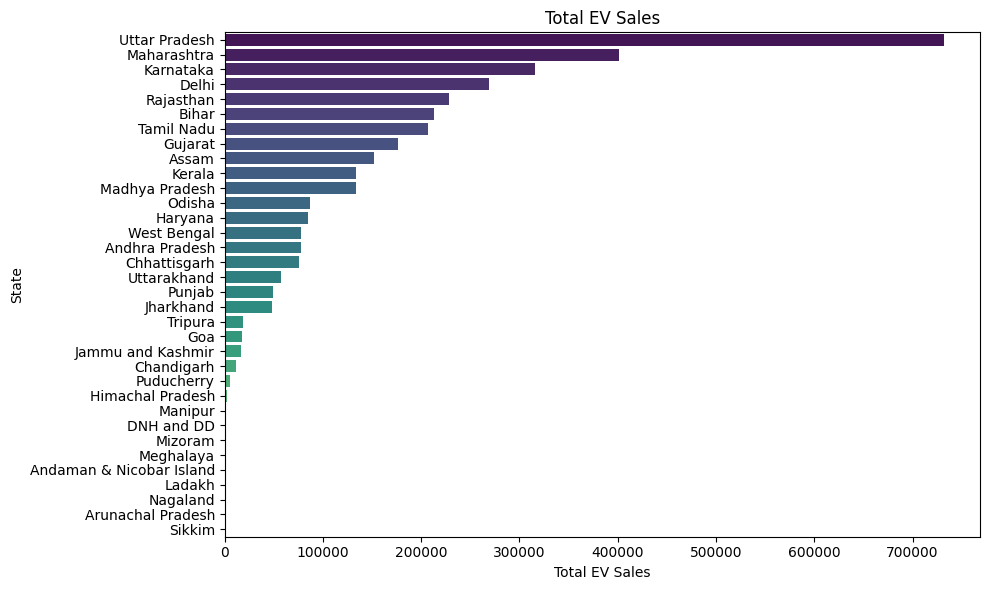

In [7]:
sales_per_state = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
sales_per_state = sales_per_state.sort_values(by='EV_Sales_Quantity', ascending=False)
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_state, x='EV_Sales_Quantity', y='State', palette='viridis')
plt.title('Total EV Sales')
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.tight_layout()

# Save the plot
plt.savefig('ev_total_sales_by_state.png', dpi=300, bbox_inches='tight')

plt.show()

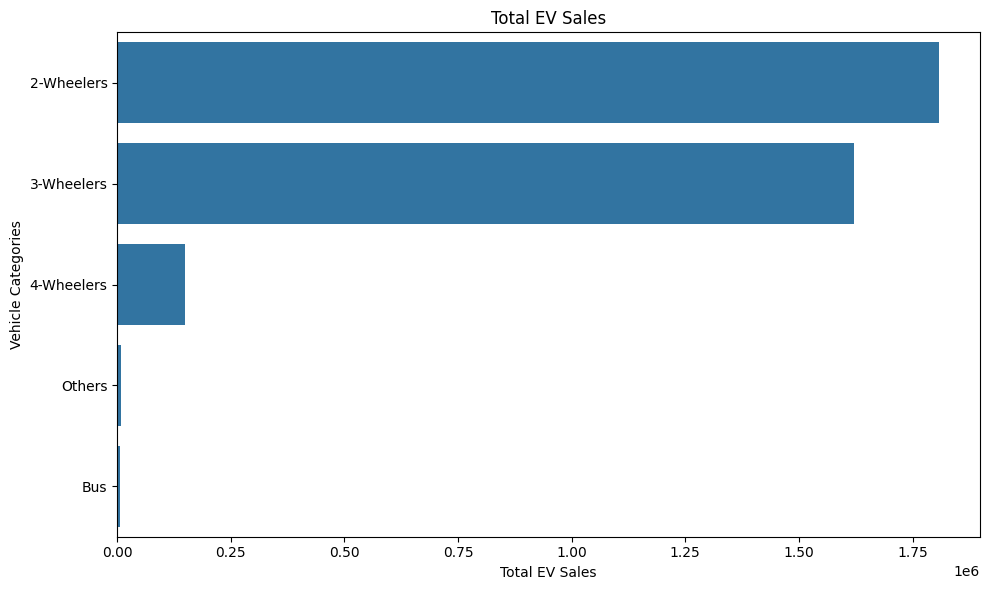

In [8]:
sales_per_category = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()
sales_per_category = sales_per_category.sort_values(by='EV_Sales_Quantity', ascending=False)
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_category, x='EV_Sales_Quantity', y='Vehicle_Category')
plt.title('Total EV Sales')
plt.xlabel('Total EV Sales')
plt.ylabel('Vehicle Categories')
plt.tight_layout()

# Save the plot
plt.savefig('ev_total_sales_by_category.png', dpi=300, bbox_inches='tight')

plt.show()

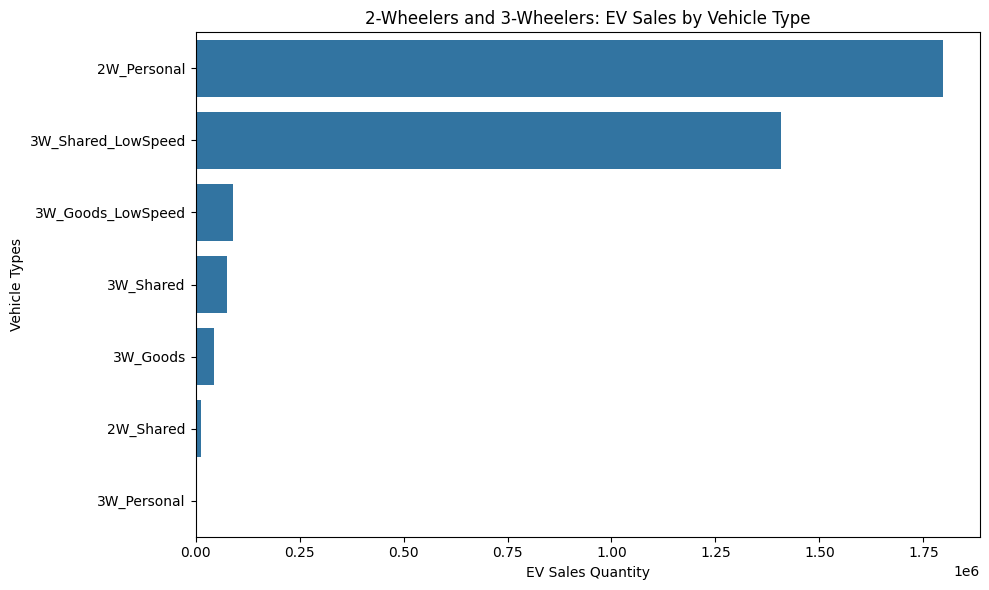

In [9]:
sales_2w_type = (
    df[df['Vehicle_Category'].isin(['2-Wheelers', '3-Wheelers'])]
    .groupby('Vehicle_Type')['EV_Sales_Quantity']
    .sum()
    .reset_index()
    .sort_values(by='EV_Sales_Quantity', ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_2w_type, x='EV_Sales_Quantity', y='Vehicle_Type')
plt.title('2-Wheelers and 3-Wheelers: EV Sales by Vehicle Type')
plt.ylabel('Vehicle Types')
plt.xlabel('EV Sales Quantity')
#plt.tick_params(axis='x', rotation=45)



plt.tight_layout()

# Save the plot
plt.savefig('ev_sales_by_vehicle_type_2w_3w.png', dpi=300, bbox_inches='tight')
plt.show()


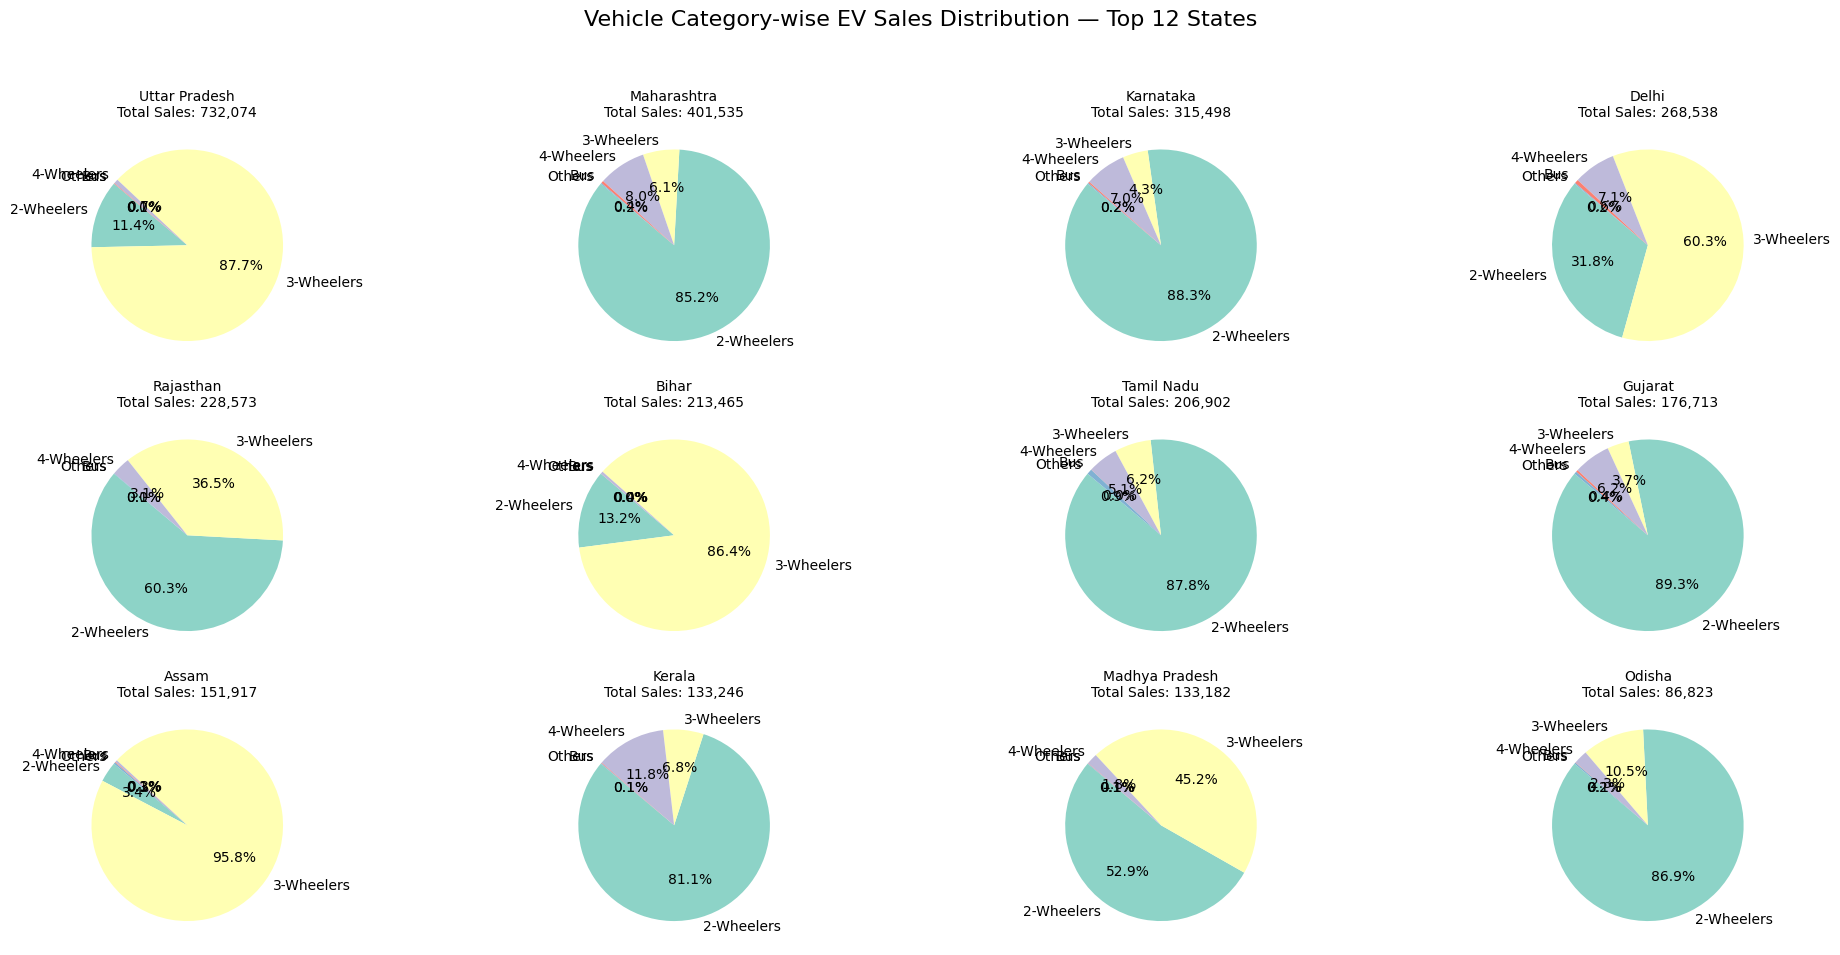

In [10]:
top12_states = sales_per_state.head(12)['State'].tolist()
top12_df = df[df['State'].isin(top12_states)]
grouped = top12_df.groupby(['State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()

fig, axes = plt.subplots(3, 4, figsize=(20, 10))  # 2 rows × 5 columns
axes = axes.flatten()

for i, state in enumerate(top12_states):
    ax = axes[i]

    state_data = grouped[grouped['State'] == state]
    total_sales = state_data['EV_Sales_Quantity'].sum()
    ax.pie(state_data['EV_Sales_Quantity'], labels=state_data['Vehicle_Category'],
           autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

    ax.set_title(f"{state}\nTotal Sales: {int(total_sales):,}", fontsize=10)

# Remove unused axes if any
for j in range(len(top12_states), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Vehicle Category-wise EV Sales Distribution — Top 12 States', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure
plt.savefig('ev_category_distribution_top10_states.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-11-3877860866.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='EV_Sales_Quantity', y='State', ax=ax, palette='Set2')
/tmp/ipython-input-11-3877860866.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='EV_Sales_Quantity', y='State', ax=ax, palette='Set2')


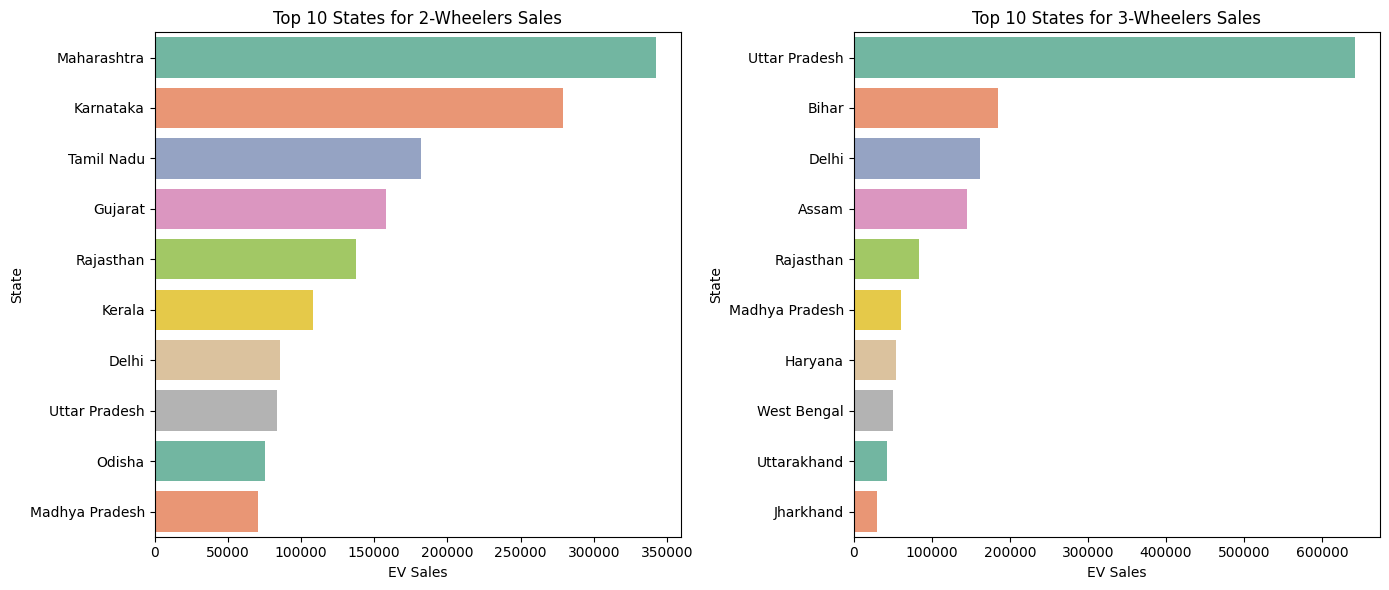

In [11]:
category_state_sales = df.groupby(['Vehicle_Category', 'State'])['EV_Sales_Quantity'].sum().reset_index()
vehicle_categories = ['2-Wheelers', '3-Wheelers']

# Create subplots for each category
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
if len(vehicle_categories) == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, category in zip(axes, vehicle_categories):
    subset = category_state_sales[category_state_sales['Vehicle_Category'] == category]
    top_states = subset.sort_values(by='EV_Sales_Quantity', ascending=False).head(10)
    sns.barplot(data=top_states, x='EV_Sales_Quantity', y='State', ax=ax, palette='Set2')
    ax.set_title(f'Top 10 States for {category} Sales')
    ax.set_xlabel('EV Sales')
    ax.set_ylabel('State')

plt.tight_layout()
plt.savefig('top_states_2w_3w_sales.png', dpi=300, bbox_inches='tight')
plt.show()

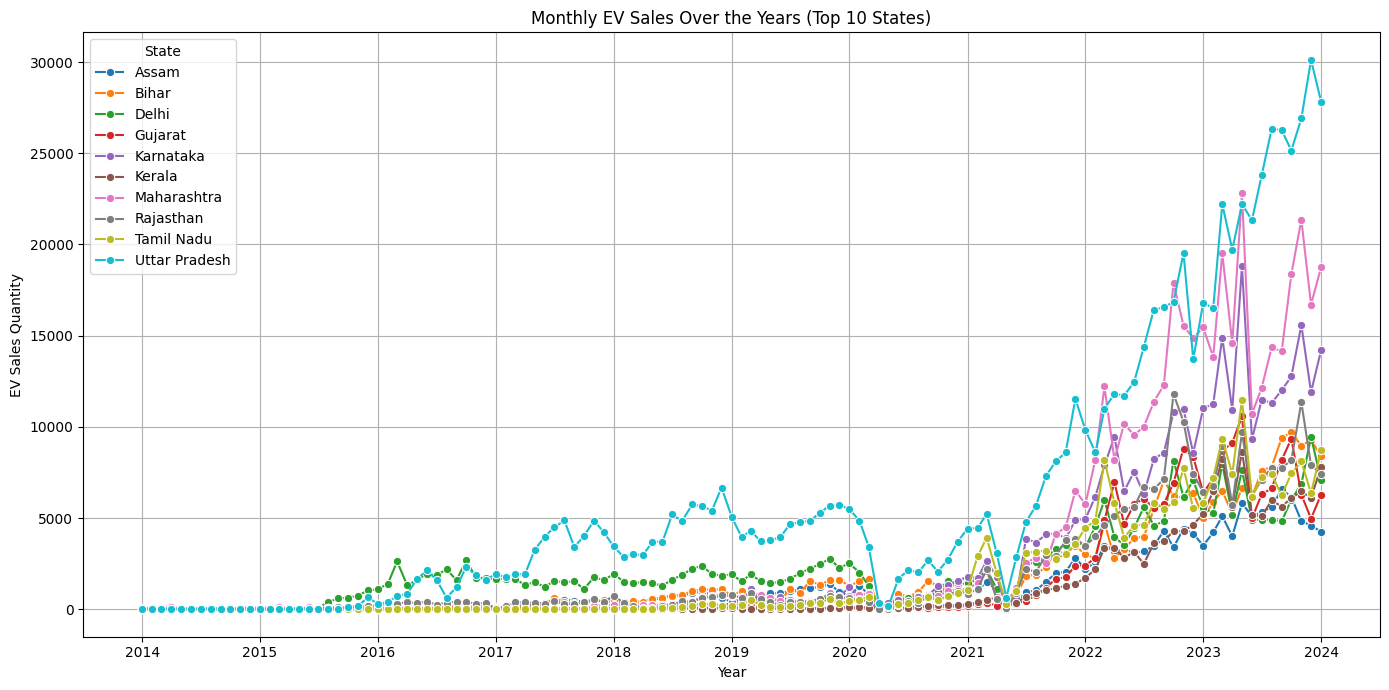

In [12]:
month_map = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['Month_Num'] = df['Month_Name'].str.lower().map(month_map)

df['New_Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')
#df['Date'] = pd.to_datetime()
top_states = (
    df.groupby('State')['EV_Sales_Quantity']
    .sum()
    .nlargest(10)
    .index.tolist()
)

# Step 4: Filter data for top 10 states
top_df = df[df['State'].isin(top_states)]

# Step 5: Group by state and date
state_monthly_sales = (
    top_df.groupby(['State', 'New_Date'])['EV_Sales_Quantity']
    .sum()
    .reset_index()
)

# Step 6: Plot monthly trend
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=state_monthly_sales,
    x='New_Date', y='EV_Sales_Quantity',
    hue='State', marker='o'
)
plt.title('Monthly EV Sales Over the Years (Top 10 States)')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_ev_sales_over_the_years.png', dpi=300, bbox_inches='tight')
plt.show()


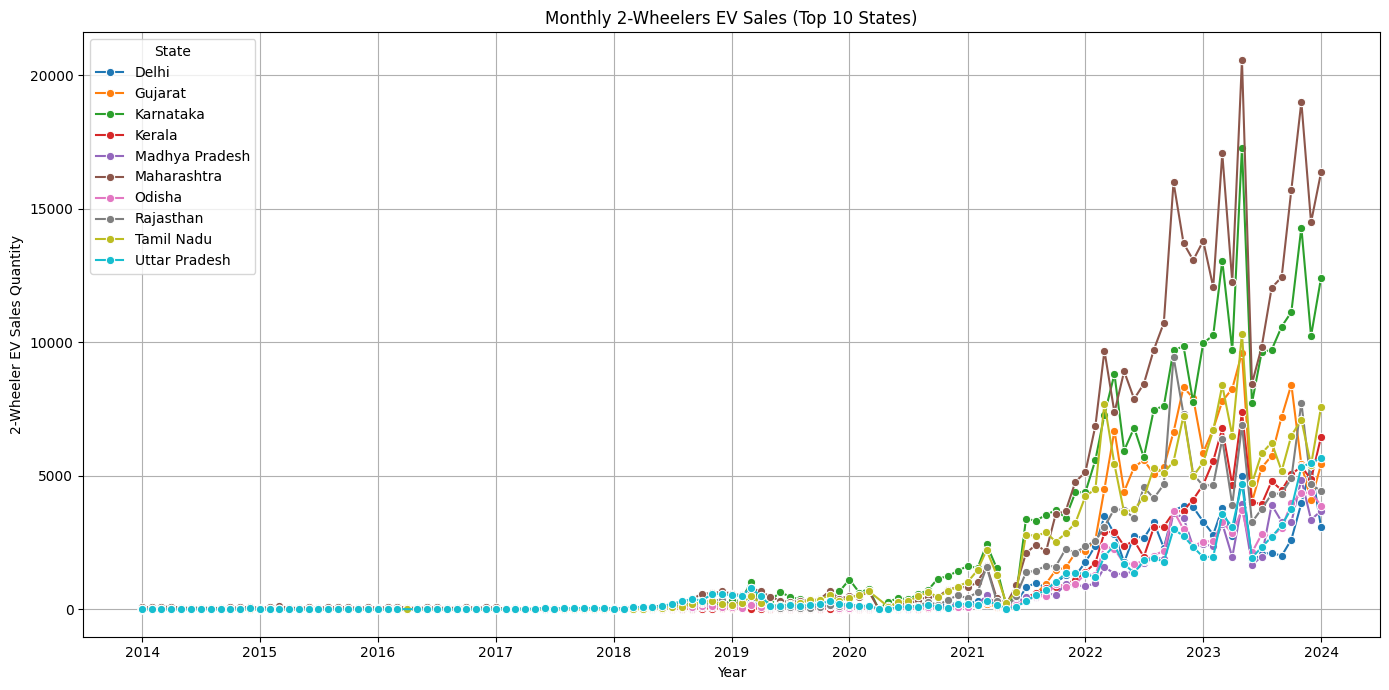

In [13]:
# Filter for 2-Wheelers
df_2w = df[df['Vehicle_Category'] == '2-Wheelers']

# Get top 10 states in 2-Wheeler sales
top_2w_states = (
    df_2w.groupby('State')['EV_Sales_Quantity']
    .sum()
    .nlargest(10)
    .index.tolist()
)

# Filter and group
df_2w_top = df_2w[df_2w['State'].isin(top_2w_states)]
monthly_2w_sales = (
    df_2w_top.groupby(['State', 'New_Date'])['EV_Sales_Quantity']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_2w_sales,
    x='New_Date', y='EV_Sales_Quantity',
    hue='State', marker='o'
)
plt.title('Monthly 2-Wheelers EV Sales (Top 10 States)')
plt.xlabel('Year')
plt.ylabel('2-Wheeler EV Sales Quantity')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_2w_sales_top10.png', dpi=300, bbox_inches='tight')
plt.show()


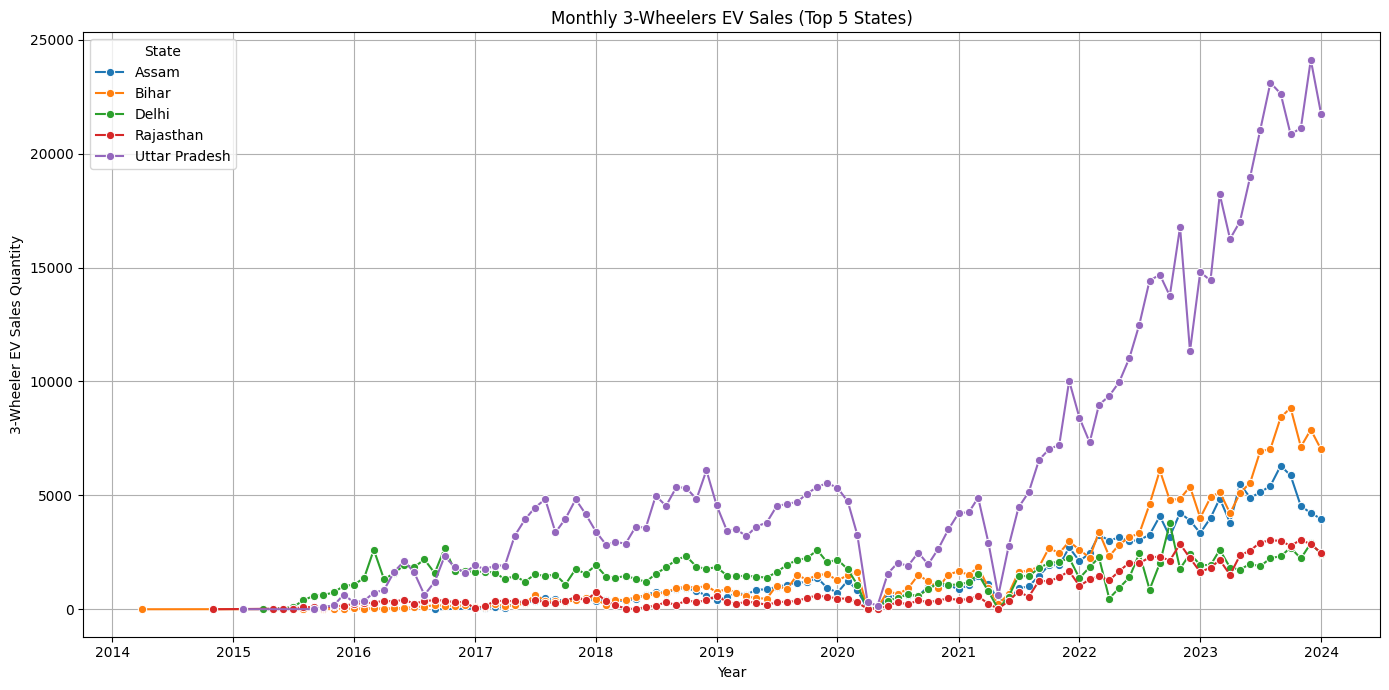

In [14]:
# Filter for 3-Wheelers
df_3w = df[df['Vehicle_Category'] == '3-Wheelers']

# Get top 5 states in 3-Wheeler sales
top_3w_states = (
    df_3w.groupby('State')['EV_Sales_Quantity']
    .sum()
    .nlargest(5)
    .index.tolist()
)

# Filter and group
df_3w_top = df_3w[df_3w['State'].isin(top_3w_states)]
monthly_3w_sales = (
    df_3w_top.groupby(['State', 'New_Date'])['EV_Sales_Quantity']
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_3w_sales,
    x='New_Date', y='EV_Sales_Quantity',
    hue='State', marker='o'
)
plt.title('Monthly 3-Wheelers EV Sales (Top 5 States)')
plt.xlabel('Year')
plt.ylabel('3-Wheeler EV Sales Quantity')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_3w_sales_top5.png', dpi=300, bbox_inches='tight')
plt.show()


Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')


<Axes: >

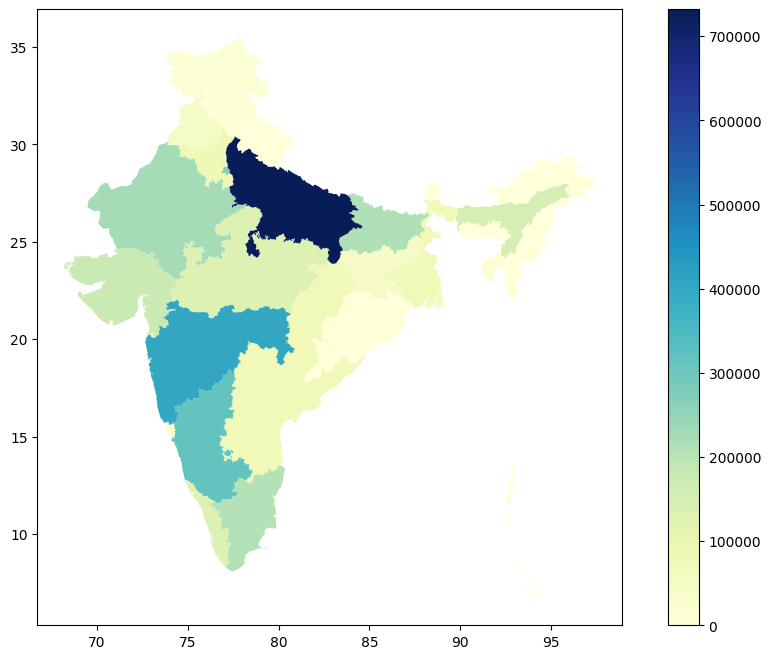

In [20]:
import geopandas as gpd
import pandas as pd

# Step 1: Correct state name typos (if any)
state_name_corrections = {
    "Andaman & Nicobar Island": "Andaman and Nicobar Islands",
    "DNH and DD": "Dadra and Nagar Haveli and Daman and Diu",
    "Telengana": "Telangana"
}

df['State'] = df['State'].replace(state_name_corrections)

# Step 2: Aggregate EV sales by state
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

# Step 3: Load India GeoJSON (adjust path as needed)
india = gpd.read_file('/content/india.geojson.json')  # ← Check this path is correct

# Step 4: Inspect columns in GeoJSON to find the correct name column
print(india.columns)  # Run this to see available columns

# Let's assume the name column is 'NAME_1' (adjust this if it's different)
india['NAME_1'] = india['NAME_1'].str.strip().str.lower()
state_sales['State'] = state_sales['State'].str.strip().str.lower()

# Step 5: Merge GeoDataFrame with EV sales
india_ev = india.merge(state_sales, left_on='NAME_1', right_on='State', how='left')

# Step 6: Fill missing sales data with 0
india_ev['EV_Sales_Quantity'] = india_ev['EV_Sales_Quantity'].fillna(0)

# Optional: Plot
india_ev.plot(column='EV_Sales_Quantity', cmap='YlGnBu', legend=True, figsize=(12, 8))


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create feature matrix: rows=states, columns=categories
state_features = df.pivot_table(
    index='State',
    columns='Vehicle_Category',
    values='EV_Sales_Quantity',
    aggfunc='sum',
    fill_value=0
)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(state_features)

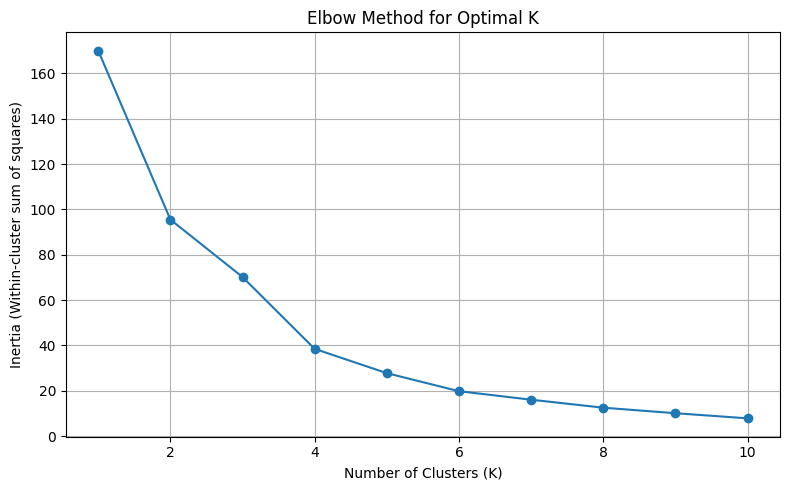

In [24]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
state_features['Cluster'] = clusters

In [26]:
cluster_summary = state_features.groupby('Cluster').mean()
print(cluster_summary)

# Assign color labels based on mean total EV sales
state_features['Total_Sales'] = state_features.drop(columns='Cluster').sum(axis=1)
cluster_means = state_features.groupby('Cluster')['Total_Sales'].mean().sort_values()

# Map cluster ID to qualitative labels based on total sales
cluster_labels = {cluster: f"Cluster {i+1} (avg={int(mean):,})"
                  for i, (cluster, mean) in enumerate(cluster_means.items())}

state_features['Cluster_Label'] = state_features['Cluster'].map(cluster_labels)

Vehicle_Category     2-Wheelers     3-Wheelers    4-Wheelers          Bus  \
Cluster                                                                     
0                  23319.888889   27262.111111   1759.370370    50.703704   
1                 235421.666667   66662.000000  24523.333333  1402.333333   
2                 129478.000000   14113.666667   7752.000000   228.333333   
3                  83769.000000  641906.000000   5446.000000   748.000000   

Vehicle_Category       Others  
Cluster                        
0                   99.629630  
1                  514.333333  
2                 1391.333333  
3                  205.000000  


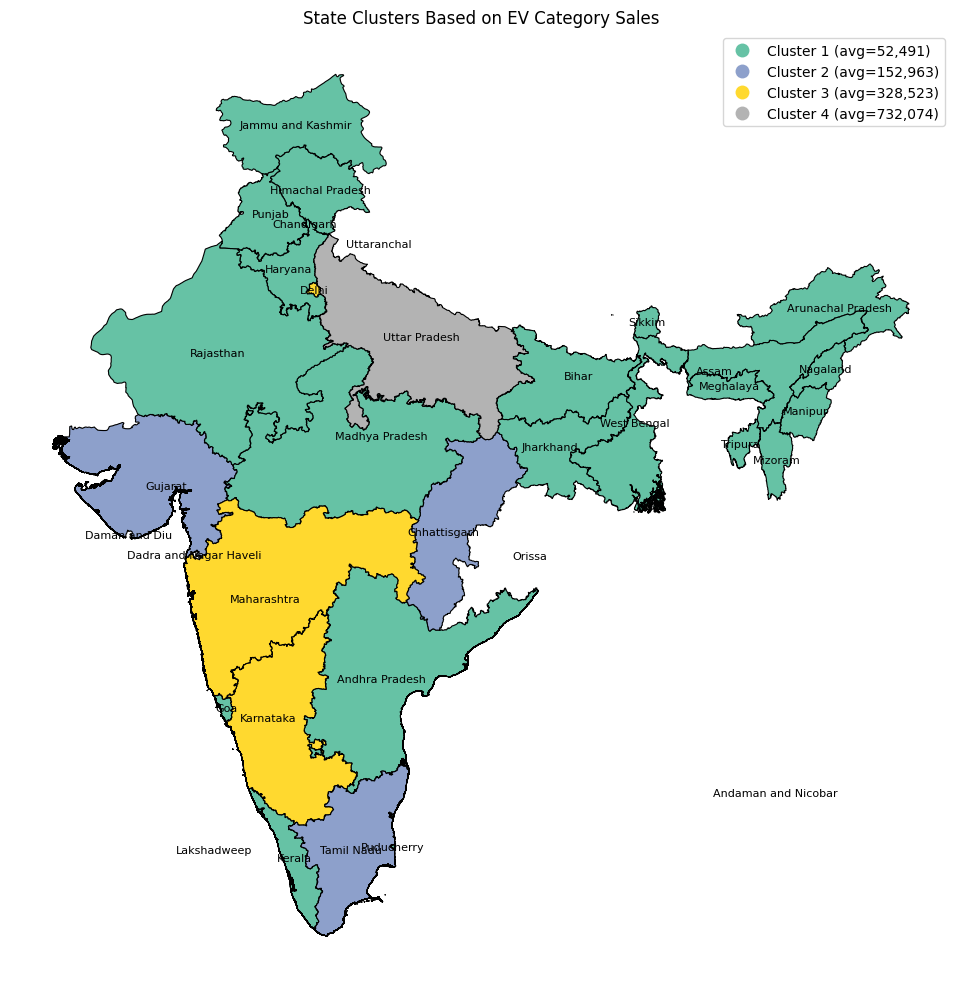

In [37]:
india = gpd.read_file('/content/india.geojson.json')

# Merge cluster info into GeoDataFrame
india_clusters = india.merge(state_features, left_on='NAME_1', right_index=True, how='left')

# Dissolve duplicate geometries (in case of MultiPolygons with multiple parts)
# Group by state name to ensure unique labels
label_df = india_clusters.dissolve(by='NAME_1', as_index=False)

# Plot base map
fig, ax = plt.subplots(figsize=(12, 10))
india_clusters.plot(
    column='Cluster_Label',
    cmap='Set2',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add state names at centroids (or better: representative points)
for idx, row in label_df.iterrows():
    label_point = row['geometry'].representative_point()
    ax.text(
        label_point.x, label_point.y,
        row['NAME_1'],
        fontsize=8,
        ha='center',
        va='center'
    )

plt.title('State Clusters Based on EV Category Sales')
plt.axis('off')
plt.tight_layout()
plt.savefig('clusters_in_map.png', dpi=300, bbox_inches='tight')
plt.show()


In [33]:
sales_2w = df[df['Vehicle_Category'] == '2-Wheelers']
state_2w = sales_2w.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
state_2w = state_2w.set_index('State')

# Normalize
scaler = StandardScaler()
X_2w_scaled = scaler.fit_transform(state_2w)

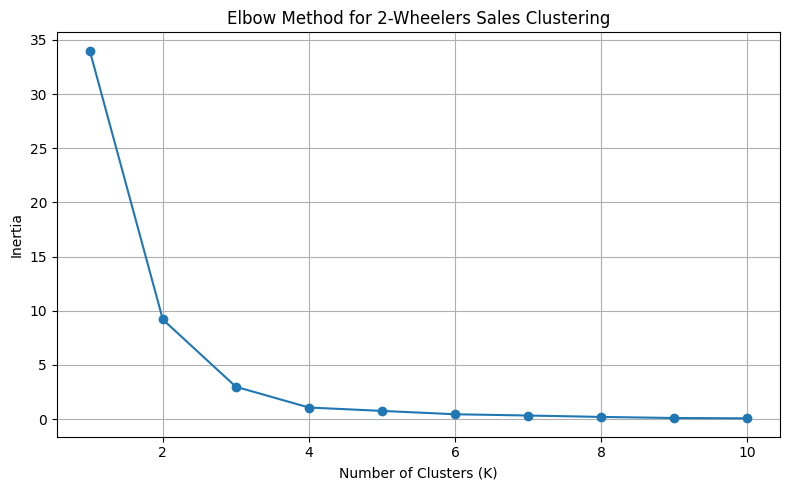

In [34]:
inertia_2w = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_2w_scaled)
    inertia_2w.append(model.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_2w, marker='o')
plt.title('Elbow Method for 2-Wheelers Sales Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.savefig('2w_elbow_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [35]:
optimal_k_2w = 4
kmeans_2w = KMeans(n_clusters=optimal_k_2w, random_state=42)
clusters_2w = kmeans_2w.fit_predict(X_2w_scaled)

# Add labels
state_2w['Cluster'] = clusters_2w
state_2w['Total_Sales'] = state_2w['EV_Sales_Quantity']

# Compute average sales in each cluster
cluster_means_2w = state_2w.groupby('Cluster')['Total_Sales'].mean().sort_values()

# Assign readable labels
cluster_labels_2w = {
    cluster: f"Cluster {i+1} (avg={int(mean):,})"
    for i, (cluster, mean) in enumerate(cluster_means_2w.items())
}
state_2w['Cluster_Label'] = state_2w['Cluster'].map(cluster_labels_2w)


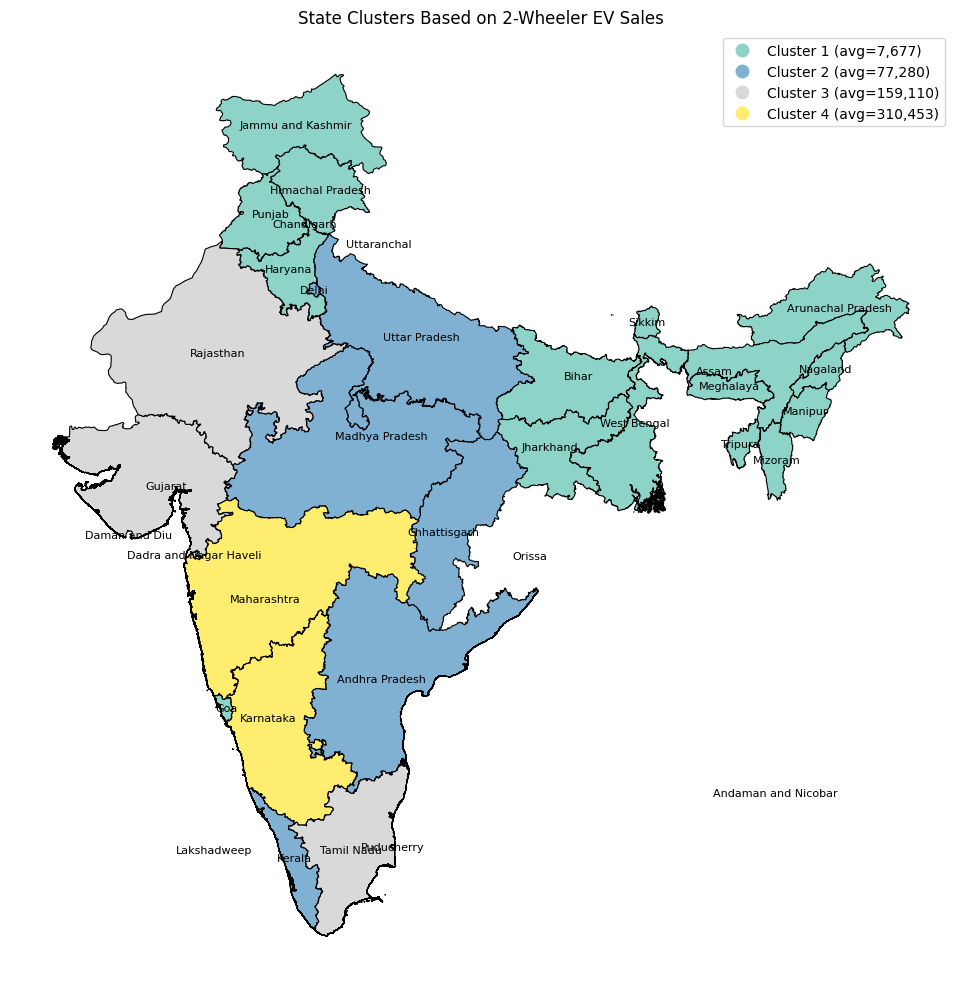

In [38]:
india = gpd.read_file('/content/india.geojson.json')

# Merge GeoJSON with cluster data
india_clusters_2w = india.merge(state_2w, left_on='NAME_1', right_index=True, how='left')

# Dissolve duplicate geometries if needed
label_df_2w = india_clusters_2w.dissolve(by='NAME_1', as_index=False)

# Plot map
fig, ax = plt.subplots(figsize=(12, 10))
india_clusters_2w.plot(
    column='Cluster_Label',
    cmap='Set3',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=ax
)

# Add state names
for idx, row in label_df_2w.iterrows():
    label_point = row['geometry'].representative_point()
    ax.text(
        label_point.x, label_point.y,
        row['NAME_1'],
        fontsize=8,
        ha='center',
        va='center'
    )

plt.title('State Clusters Based on 2-Wheeler EV Sales')
plt.axis('off')
plt.tight_layout()
plt.savefig('clusters_2w_map.png', dpi=300, bbox_inches='tight')
plt.savefig('2w_clusters_in_map.png', dpi=300, bbox_inches='tight')
plt.show()


In [39]:
# Get top 2 clusters by average sales
top_clusters = cluster_means_2w.sort_values(ascending=False).head(2).index

# Print states in top clusters
for i, cluster in enumerate(top_clusters, 1):
    states = state_2w[state_2w['Cluster'] == cluster].index.tolist()
    print(f"Cluster {i} (avg={int(cluster_means_2w[cluster]):,}):")
    for state in states:
        print(f"  - {state}")
    print()


Cluster 1 (avg=310,453):
  - Karnataka
  - Maharashtra

Cluster 2 (avg=159,110):
  - Gujarat
  - Rajasthan
  - Tamil Nadu



 **Feature Engineering & Encoding**

In [41]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Fix date format
df['Date'] = pd.to_datetime(df['Date'])  # adjust column name if needed
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Encode categorical features
df['State'] = df['State'].astype('category')
df['Vehicle_Category'] = df['Vehicle_Category'].astype('category')

df['State_code'] = df['State'].cat.codes
df['Vehicle_code'] = df['Vehicle_Category'].cat.codes


**Build Training Dataset**

In [42]:
# Features and target
X = df[['State_code', 'Vehicle_code', 'Year', 'Month']]
y = df['EV_Sales_Quantity']  # Change if your target column is named differently

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

**Evaluate**

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_pred = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.79
R² Score: 0.64


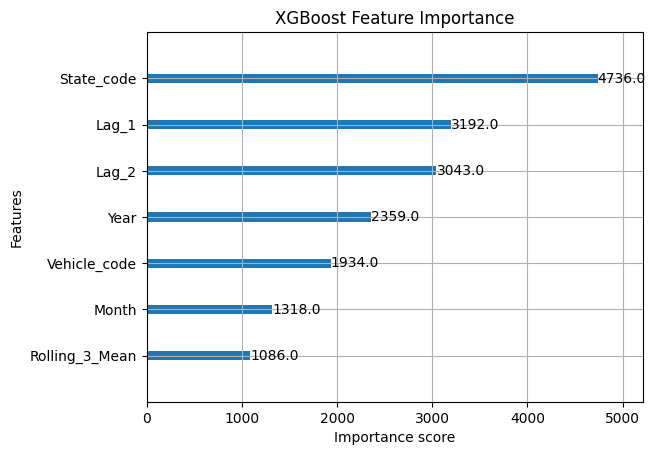

In [68]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


In [69]:
print(df['Vehicle_Category'].unique())


['2-wheelers', '3-wheelers', '4-wheelers', 'bus', 'others']
Categories (5, object): ['2-wheelers', '3-wheelers', '4-wheelers', 'bus', 'others']


In [70]:
print(df['State'].unique())

['andaman & nicobar island', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', ..., 'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']
Length: 34
Categories (34, object): ['andaman & nicobar island', 'andhra pradesh', 'arunachal pradesh', 'assam', ...,
                          'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


Prediction **Example**

In [76]:
# Predict Jan 2025 EV 2W sales for Maharashtra (safe version)
state_name = 'maharashtra'
vehicle_type = '2-wheelers'  # make sure it's lowercase and stripped

# Check that they exist
if (state_name in df['State'].values) and (vehicle_type in df['Vehicle_Category'].values):
    state_code = df[df['State'] == state_name]['State_code'].iloc[0]
    vehicle_code = df[df['Vehicle_Category'] == vehicle_type]['Vehicle_code'].iloc[0]

    # Use the most recent known values for lag features (e.g., Dec 2024)
    latest = df[(df['State'] == state_name) & (df['Vehicle_Category'] == vehicle_type)].sort_values('Date').iloc[-1]
    lag_1 = latest['EV_Sales_Quantity']
    lag_2 = df[(df['State'] == state_name) & (df['Vehicle_Category'] == vehicle_type)].sort_values('Date').iloc[-2]['EV_Sales_Quantity']
    rolling_mean = df[(df['State'] == state_name) & (df['Vehicle_Category'] == vehicle_type)].sort_values('Date').iloc[-3:-1]['EV_Sales_Quantity'].mean()

    # Build input
    future_input = pd.DataFrame([[state_code, vehicle_code, 2025, 1, lag_1, lag_2, rolling_mean]], columns=X.columns)

    # Predict and inverse transform
    pred_2025_log = model.predict(future_input)
    pred_2025 = np.expm1(pred_2025_log)

    print(f"📈 Predicted EV Sales for Maharashtra 2W in Jan 2025: {int(pred_2025[0])}")
else:
    print("❌ State or Vehicle category not found. Check name or case.")



📈 Predicted EV Sales for Maharashtra 2W in Jan 2025: 1083


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Use same features and target as with XGBoost
X = df[features]
y = df['Log_EV_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = rf_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

rmse = sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

print(f"🌳 Random Forest RMSE: {rmse:.2f}")
print(f"🌳 Random Forest R² Score: {r2:.2f}")


🌳 Random Forest RMSE: 395.70
🌳 Random Forest R² Score: 0.06
